In [296]:
from car_data import bmws, priuses
from matplotlib import pyplot as plt
from math import exp, log,sqrt
import numpy as np


In [297]:
relevant_bmws = [(b.mileage, b.price, 1) for b in bmws]
relevant_priuses = [(b.mileage, b.price, 0) for b in priuses]
all_car_data = [
    *relevant_bmws,
    *relevant_priuses
]
all_car_data

[(93404.0, 13999.0, 1),
 (110890.0, 13995.0, 1),
 (94133.0, 13982.0, 1),
 (46778.0, 14599.0, 1),
 (53106.0, 22500.0, 1),
 (58761.0, 24998.0, 1),
 (108816.0, 24947.0, 1),
 (81100.0, 13995.0, 1),
 (90000.0, 8400.0, 1),
 (68613.0, 14995.0, 1),
 (94000.0, 11995.0, 1),
 (92500.0, 10995.0, 1),
 (112081.0, 11995.0, 1),
 (105121.0, 11500.0, 1),
 (92000.0, 2013.0, 1),
 (107953.0, 12999.0, 1),
 (56000.0, 18995.0, 1),
 (101191.0, 18900.0, 1),
 (64365.0, 16998.0, 1),
 (66000.0, 10000.0, 1),
 (76675.0, 12500.0, 1),
 (93015.0, 15995.0, 1),
 (80917.0, 14970.0, 1),
 (96000.0, 16795.0, 1),
 (70000.0, 12999.0, 1),
 (107000.0, 11950.0, 1),
 (78000.0, 18995.0, 1),
 (78000.0, 15000.0, 1),
 (92000.0, 2013.0, 1),
 (57624.0, 21963.0, 1),
 (77854.0, 16995.0, 1),
 (48310.0, 22998.0, 1),
 (51656.0, 20998.0, 1),
 (62410.0, 19991.0, 1),
 (39332.0, 29995.0, 1),
 (31420.0, 21000.0, 1),
 (41267.0, 22450.0, 1),
 (73000.0, 19999.0, 1),
 (94608.0, 11995.0, 1),
 (67000.0, 24964.0, 1),
 (50000.0, 18985.0, 1),
 (73601.0, 1

In [298]:
def bmw_finder(mileage, price):
    return 1 if price > 25000 else 0

In [299]:
def test_classifier(classifier, data):
    trues = 0
    falses = 0
    for mileage,price,is_bmw in data:
        if is_bmw == classifier(mileage, price):
            trues += 1
        else:
            falses += 1
    return trues / (trues + falses)

In [300]:
test_classifier(bmw_finder, all_car_data)

0.59

Exercise 15.1: Update the test_classifier function to print the number of true positives, true negatives, false positives, and false negatives. Printing these for the bmw_finder classifier, what can you tell about the performance of the classifier?

In [301]:
def test_classifier_print(classifier, data):
    trues = 0
    falses = 0
    for mileage,price,is_bmw in data:
        classification = classifier(mileage, price)
        if is_bmw == classification:
            trues += 1
            print("True positive")
        elif (is_bmw == 1) and classification == 0:
            falses += 1
            print("False negative")

        elif (is_bmw == 0) and classification == 1:
            trues += 1
            print("False positive")
        else:
            falses += 1
            print("True negative")
    return trues / (trues + falses)

In [302]:
test_classifier_print(bmw_finder, all_car_data)

False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
True positive
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
False negative
True positive
False negative
False negative
True positive
False negative
False negative
False negative
False negative
False negative
False negative
False negative
True positive
False negative
True positive
True positive
True positive
True positive
False negative
False negative
False negative
False negative
False negative
False negative
Fal

0.59

In [303]:
def test_classifier_refined(classifier, data, verbose=False):
    true_positives = 0
    true_negatives = 0
    false_positives = 0
    false_negatives = 0

    for mileage,price,is_bmw in data:
        prediction = classifier(mileage, price)
        if prediction and is_bmw:
            true_positives += 1
        elif prediction:
            false_positives += 1
        elif is_bmw:
            false_negatives += 1
        else:
            true_negatives += 1
    
    if verbose:
        print(f"""Data size: {len(data)}\nTrue positives: {true_positives}\nTrue negatives: {true_negatives}\nFalse positives: {false_positives}\nFalse negatives: {false_negatives}""")
    total = true_positives + true_negatives
    return total / len(data)

In [304]:
test_classifier_refined(bmw_finder, all_car_data, verbose=True)

Data size: 200
True positives: 18
True negatives: 100
False positives: 0
False negatives: 82


0.59

Exercise 15.2: Find a way to update the bmw_finder function to improve its performance and use the test_classifier function to confirm that your improved function has better than 59% accuracy.

In [305]:
test_classifier_refined(lambda m,p: 1 if m > 13000 and p > 18000 else 0, all_car_data, verbose=True)

Data size: 200
True positives: 62
True negatives: 97
False positives: 3
False negatives: 38


0.795

In [306]:
def plot_data(ds):
    plt.scatter([d[0] for d in ds if d[2]==0],[d[1] for d in ds if d[2]==0],c='C1')
    plt.scatter([d[0] for d in ds if d[2]==1],[d[1] for d in ds if d[2]==1],c='C0',marker='x')
    plt.ylabel("Price ($)",fontsize=16)
    plt.xlabel("Odometer (mi)",fontsize=16)

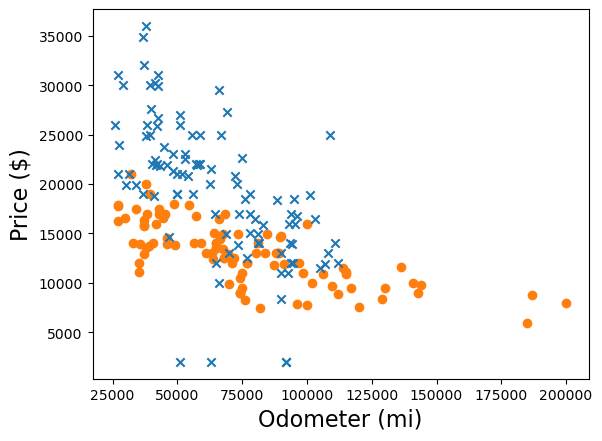

In [307]:
plot_data(all_car_data)

In [308]:
def decision_boundary_fn(mileage, price):
    return 1 if price > 21000 - 0.07 * mileage else 0

In [309]:
test_classifier_refined(decision_boundary_fn, all_car_data, verbose=True)

Data size: 200
True positives: 73
True negatives: 88
False positives: 12
False negatives: 27


0.805

Exercise 15.3-Mini Project: What is the decision boundary of the form p = constant that gives the best classification accuracy on the test data set?

In [310]:
def cutoff_price_classifier(cutoff_price):
    return lambda m,p: 1 if p > cutoff_price else 0

def cutoff_price_accuracy(cutoff_price):
    price_fn = cutoff_price_classifier(cutoff_price)
    return test_classifier_refined(price_fn, all_car_data)

all_prices = [car[1] for car in all_car_data]
most_accurate_cutoff_price = max(all_prices, key=cutoff_price_accuracy)


In [311]:
test_classifier_refined(cutoff_price_classifier(most_accurate_cutoff_price), all_car_data, verbose=True)

Data size: 200
True positives: 62
True negatives: 97
False positives: 3
False negatives: 38


0.795

In [312]:
def make_scale(data):
    min_val = min(data)
    max_val = max(data)

    scale = lambda x: (x - min_val) / (max_val - min_val)
    unscale = lambda y: y * (max_val - min_val) + min_val
    return scale, unscale

scale_price,unscale_price = make_scale([c[1] for c in all_car_data])
scale_milage,unscale_mileage = make_scale([c[0] for c in all_car_data])

print(f"Original price: {all_car_data[1][1]}")
print(f"Scaled down price example: {scale_price(all_car_data[1][1])}")
print(f"Unscaled down price example: {unscale_price(scale_price(all_car_data[1][1]))}")

Original price: 13995.0
Scaled down price example: 0.35265032227683435
Unscaled down price example: 13995.0


In [313]:
scaled_car_data = [(scale_milage(m), scale_price(p), is_bmw) for m,p,is_bmw in all_car_data]

In [314]:
scaled_car_data

[(0.3873793103448276, 0.35276804897430614, 1),
 (0.4878735632183908, 0.35265032227683435, 1),
 (0.39156896551724135, 0.3522677105100509, 1),
 (0.11941379310344828, 0.37042705359507905, 1),
 (0.1557816091954023, 0.6029667127762899, 1),
 (0.1882816091954023, 0.6764870353474409, 1),
 (0.47595402298850575, 0.6749860199546752, 1),
 (0.31666666666666665, 0.35265032227683435, 1),
 (0.367816091954023, 0.18798010418812727, 1),
 (0.2449022988505747, 0.38208199664478915, 1),
 (0.39080459770114945, 0.29378697354092476, 1),
 (0.382183908045977, 0.26435529917296996, 1),
 (0.4947183908045977, 0.29378697354092476, 1),
 (0.4547183908045977, 0.2792182947287871, 1),
 (0.3793103448275862, 0.0, 1),
 (0.4709942528735632, 0.32333637460635134, 1),
 (0.1724137931034483, 0.4998086941166083, 1),
 (0.432132183908046, 0.4970126850516526, 1),
 (0.22048850574712645, 0.44103364040380255, 1),
 (0.22988505747126436, 0.23507078317685492, 1),
 (0.291235632183908, 0.3086499690967419, 1),
 (0.38514367816091954, 0.411513671

In [315]:
def sigmoid(x):
    return 1 / (1 + exp(-x))

In [316]:
sigmoid(999), sigmoid(-12),sigmoid(0)

(1.0, 6.144174602214718e-06, 0.5)

In [317]:
def make_logistic(a,b,c):
    return lambda x,p: sigmoid(a*x + b*p - c)

In [318]:
def simple_logistic_cost(a,b,c):
    logistic_fn = make_logistic(a,b,c)
    errors = [abs(is_bmw - logistic_fn(m,p)) for m,p,is_bmw in scaled_car_data]
    return sum(errors)

In [319]:
simple_logistic_cost(0.5, 0.2,0.4)

99.80422204060353

In [320]:
def point_cost(logistic_fn, x,p,is_bmw):
    wrong_answer = 1 - is_bmw
    return -log(abs(wrong_answer - logistic_fn(x,p)))

def logistic_cost(a,b,c):
    logistic_fn = make_logistic(a,b,c)
    errors = [point_cost(logistic_fn, m,p,is_bmw) for m,p,is_bmw in scaled_car_data]
    return sum(errors)

In [321]:
def point_cost(l,x,p,is_bmw): #1
    wrong = 1 - is_bmw
    return -log(abs(wrong - l(x,p)))

def logistic_cost(a,b,c):
    l = make_logistic(a,b,c)
    errors = [point_cost(l,x,p,is_bmw) #2 
              for x,p,is_bmw in scaled_car_data]
    return sum(errors)

In [322]:
def plot_line(acoeff,bcoeff,ccoeff,**kwargs):
    a,b,c = acoeff, bcoeff, ccoeff
    
    # black by default
    if 'c' not in kwargs:
        kwargs['c'] = 'k'
        
    if b == 0:
        plt.plot([c/a,c/a],[0,1])
    else:
        def y(x):
            return (c-a*x)/b
        plt.plot([0,1],[y(0),y(1)],**kwargs)

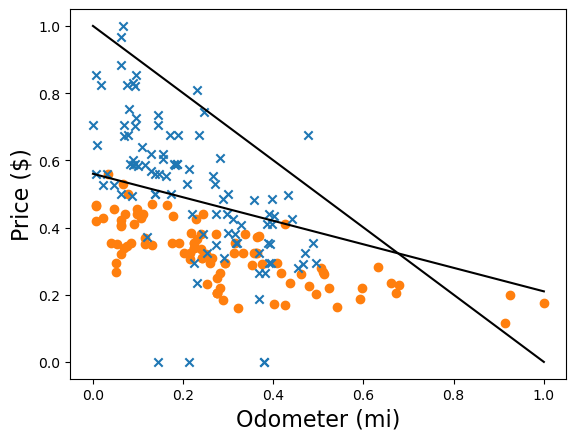

In [323]:
plot_data(scaled_car_data)
plot_line(0.35,1,0.56)
plot_line(1,1,1)

In [324]:
def plot_function(f,xmin,xmax,**kwargs):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],**kwargs)
    

In [325]:
def k(x,y):
    return sigmoid(x**2 + y**2 - 1)

In [326]:
def length(v):
    return sqrt(sum([vi*vi for vi in v]))

def secant_slope(f,xmin,xmax):
    return (f(xmax) - f(xmin)) / (xmax - xmin)
def approx_derivative(f,x,dx=1e-6):
    return secant_slope(f, x-dx, x+dx)

def approx_gradient3(f,x0,y0,z0,dx=1e-6):
    partial_x = approx_derivative(lambda x: f(x,y0,z0), x0, dx)
    partial_y = approx_derivative(lambda y: f(x0,y,z0), y0, dx)
    partial_z = approx_derivative(lambda z: f(x0,y0,z), z0, dx)
    return (partial_x, partial_y, partial_z)

def gradient_descent3(f, x_start, y_start,z_start, tolerance=1e-6, max_steps=10000):
    x = x_start
    y = y_start
    z = z_start
    count = 0
    gradient = approx_gradient3(f, x, y,z)
    while count <= max_steps and length(gradient) > tolerance:
        x -= 0.01 * gradient[0]
        y -= 0.01 * gradient[1]
        z -= 0.01 * gradient[2]
        gradient = approx_gradient3(f, x, y,z)
        count += 1
    return x,y,z

In [327]:
gradient_descent3(logistic_cost,1,1,1,max_steps=100)

(0.21615701474893284, 5.066908757496607, 2.1361023644527863)

In [328]:
gradient_descent3(logistic_cost,1,1,1,max_steps=1000)

(3.262795229175163, 10.593765755407409, 5.149346692502988)

In [329]:
gradient_descent3(logistic_cost,1,1,1)

(3.71670029333118, 11.422062370186323, 5.5968783450659325)

In [332]:
def best_logistic_classifier(x,p):
    logistic_fn = make_logistic(3.71670029333118, 11.422062370186323, 5.5968783450659325)
    pred = logistic_fn(x,p)
    # print(f"Confidence: {pred}")
    return 1 if pred >= 0.5 else 0

In [333]:
test_classifier_refined(best_logistic_classifier, scaled_car_data, verbose=True)

Confidence: 0.46810165881037796
Confidence: 0.5607965519578163
Confidence: 0.4705565803349975
Confidence: 0.284548081221747
Confidence: 0.8663701534857436
Confidence: 0.9442642919395083
Confidence: 0.9798032983813841
Confidence: 0.4032529531182194
Confidence: 0.1107901198679505
Confidence: 0.4200701314663845
Confidence: 0.312443222520175
Confidence: 0.23922509682149165
Confidence: 0.4007105825883431
Confidence: 0.32792663671820155
Confidence: 0.014963047777417552
Confidence: 0.4617832760888336
Confidence: 0.6797837377266386
Confidence: 0.8437155090770332
Confidence: 0.5646670431587463
Confidence: 0.11329961830871153
Confidence: 0.2711049804525694
Confidence: 0.630629912647292
Confidence: 0.4829885534966633
Confidence: 0.7042496166981157
Confidence: 0.2761070516645031
Confidence: 0.37141182828746466
Confidence: 0.7725393607899872
Confidence: 0.4699624443036258
Confidence: 0.014963047777417552
Confidence: 0.8563403741039715
Confidence: 0.6334964758566418
Confidence: 0.8737143685798084
Co

0.8